# Assignment 1

## Formalia:

Please read the [assignment overview page](https://github.com/suneman/socialdata2023/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc.), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Monday February 27th, 2023 at 23:55. Hand in your files via [http://peergrade.io](http://peergrade.io/). If you're not already a peergrade user, [you can use this link to sign up]( 
https://app.peergrade.io/join/44E47G) - **PLEASE USE YOUR DTU EMAIL WHEN YOU SIGN UP**.

**Peergrading date and time**: _Remember that after handing in you have 1 week to evaluate a few assignments written by other members of the class_. 

## A1 Part 1: Visualizing patterns in the data

In this sub-assignment, we recreate some of the plots from Week 2. We look only at the focus-crimes.

In [50]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

Imports and global settings

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import calplot
import plotly.express as px
from urllib.request import urlopen
import json
from IPython.display import set_matplotlib_formats

plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.sans-serif'] = "Helvetica"
set_matplotlib_formats('retina', quality=100)

/var/folders/1j/15c8wxfx0rz57_sf9j19y3fh0000gp/T/ipykernel_79197/2132148948.py:12: DeprecationWarning:

`set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`



Loading in the data

In [52]:
data_path = "/Users/Gustav/Downloads/Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv"
data = pd.read_csv(data_path)

# remove data from after last day of 2017, so we get rid of the half year of 2018
data['Date']= pd.to_datetime(data['Date'])
pre_2018_data = data[~(data['Date'] > '2017-12-31')]

For each set of plots below, describe the plots (as you would in the figure text in a report or paper), and pick a few aspects that stand out to you and comment on those (we provided a couple of ideas during class but it's OK to add more).

* First create the week-day plots, the months, the 24-hour cycle, and the 168 hours of the week as barcharts (Week 2, Part 2).

Week-day

Comments on plot: \
blabla

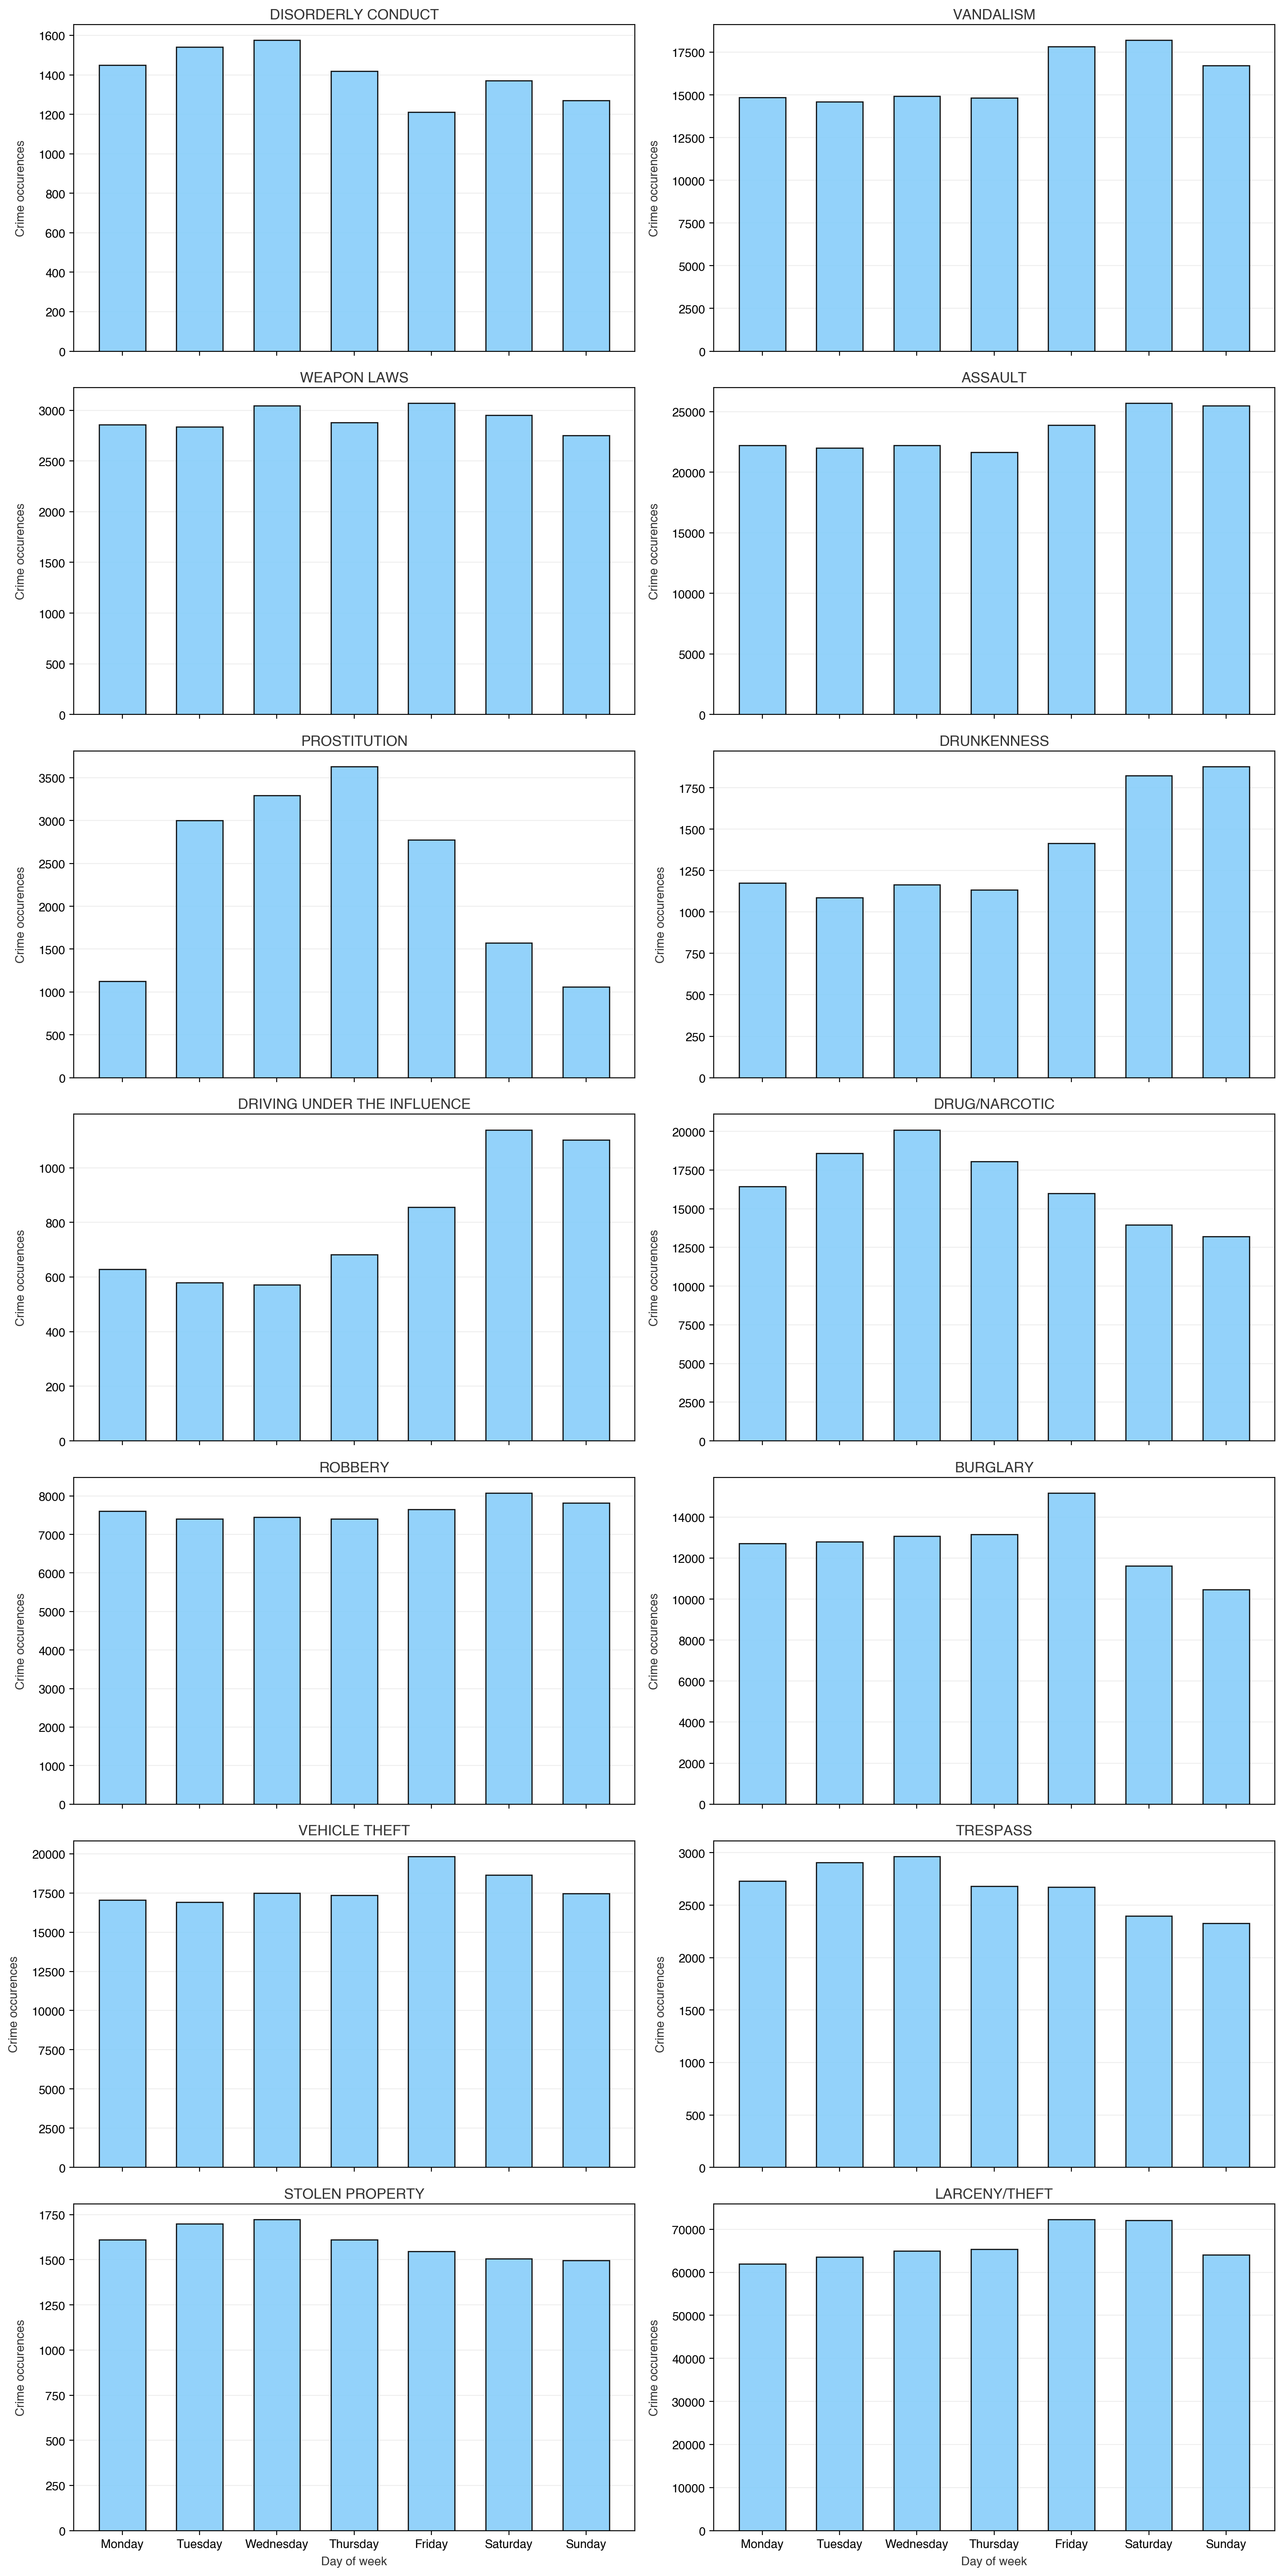

In [80]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fig, axs = plt.subplots(7, 2, figsize=(15,30), sharex=True)
row_counter = 0
column_count = 0
for category in focuscrimes:
    if row_counter == 7:
        row_counter = 0
        column_count = 1
    # get frequency of each day of the week having the respective category and sort correctly based on weekday
    data = pre_2018_data[pre_2018_data["Category"] == category]["DayOfWeek"].value_counts().reindex(weekdays) 
    
    # plot barchart
    axs[row_counter, column_count].bar(data.index, data.values, color="lightskyblue", width=0.6, alpha=0.9, edgecolor="black")
    
    axs[row_counter, column_count].set_title(category, pad=5, color='#333333', weight='bold')
    axs[row_counter, column_count].set_ylabel("Crime occurences", labelpad=10, color='#333333')

    axs[row_counter, column_count].set_axisbelow(True)
    axs[row_counter, column_count].yaxis.grid(True, color='#EEEEEE')
    
    row_counter += 1
axs[6, 0].set_xlabel("Day of week", labelpad=5, color='#333333')
axs[6, 1].set_xlabel("Day of week", labelpad=5, color='#333333')
fig.tight_layout()

Monthly

Comments on plot: \
blabla

/var/folders/1j/15c8wxfx0rz57_sf9j19y3fh0000gp/T/ipykernel_79197/3570069240.py:27: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/1j/15c8wxfx0rz57_sf9j19y3fh0000gp/T/ipykernel_79197/3570069240.py:29: UserWarning:

FixedFormatter should only be used together with FixedLocator



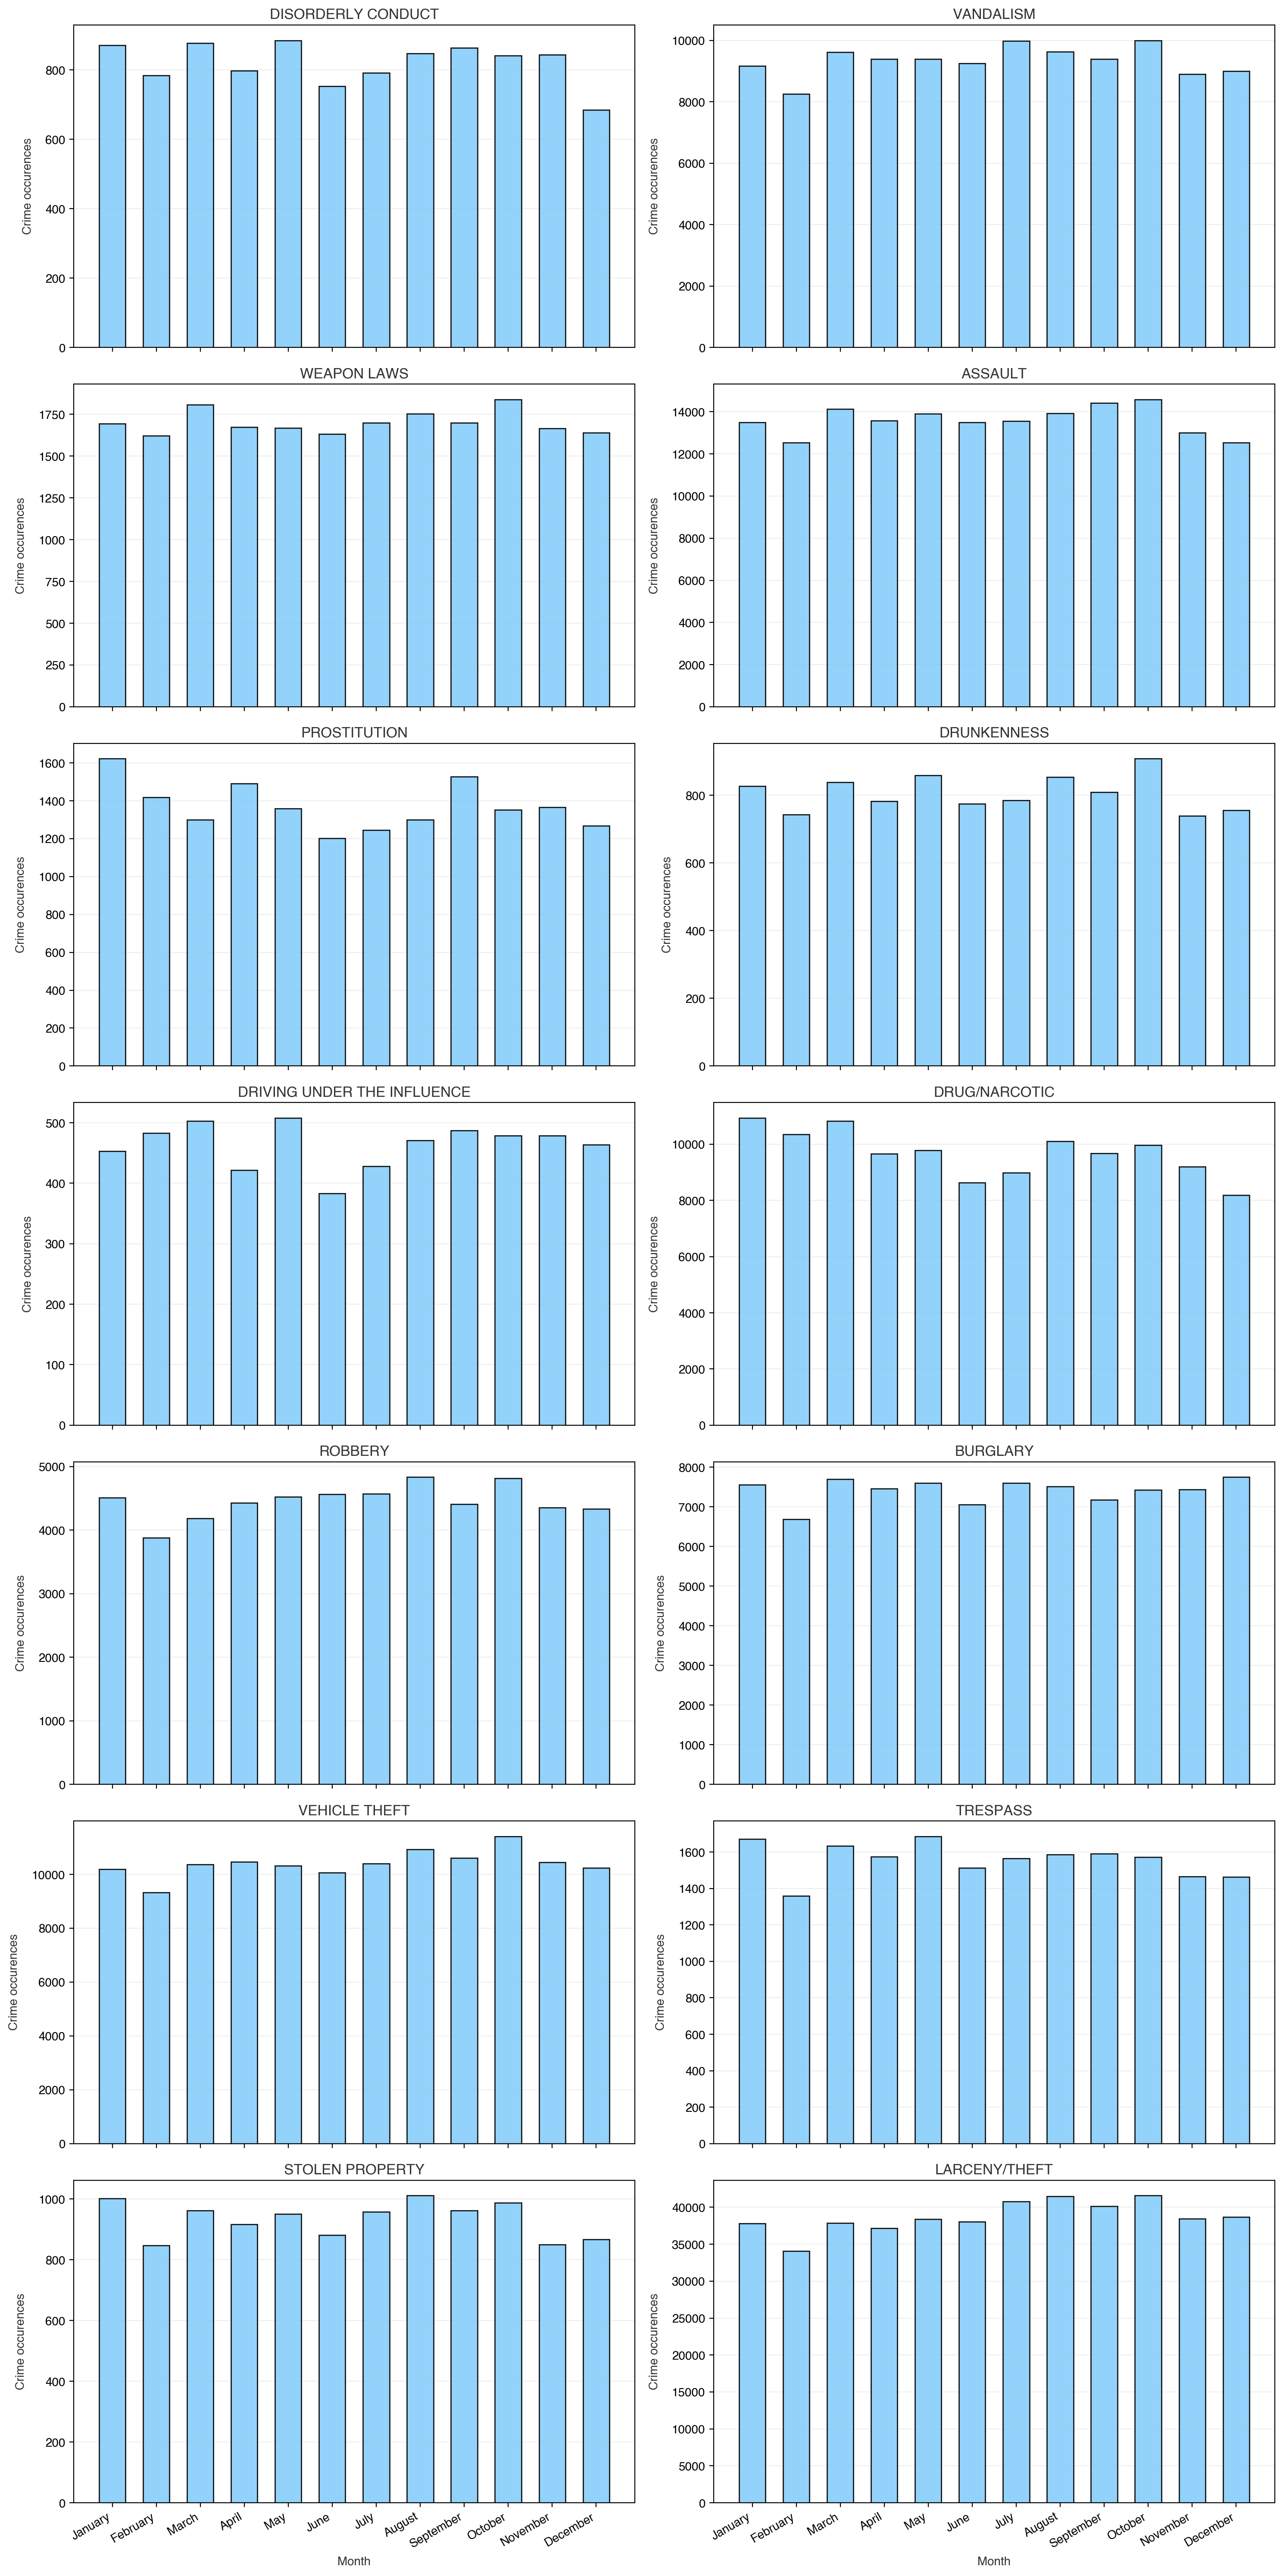

In [81]:
# add month name as a column to a copy of the dataframe
df_month = pre_2018_data.copy()
df_month['month'] = df_month['Date'].dt.month_name()

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
fig, axs = plt.subplots(7, 2, figsize=(15,30), sharex=True)
row_counter = 0
column_count = 0
for category in focuscrimes:
    if row_counter == 7:
        row_counter = 0
        column_count = 1
    # get frequency of each month having the respective category and sort according to the monthly order
    data = df_month[df_month["Category"] == category]["month"].value_counts().reindex(months)

    # plot barchart 
    axs[row_counter, column_count].bar(data.index, data.values, color="lightskyblue", width=0.6, alpha=0.9, edgecolor="black")

    axs[row_counter, column_count].set_title(category, pad=5, color='#333333', weight='bold')
    axs[row_counter, column_count].set_ylabel("Crime occurences", labelpad=10, color='#333333')
    
    axs[row_counter, column_count].set_axisbelow(True)
    axs[row_counter, column_count].yaxis.grid(True, color='#EEEEEE')

    row_counter += 1
axs[6, 0].set_xlabel("Month", labelpad=5, color='#333333')
axs[6, 0].set_xticklabels(months, rotation=30, ha='right')
axs[6, 1].set_xlabel("Month", labelpad=5, color='#333333')
axs[6, 1].set_xticklabels(months, rotation=30, ha='right')
fig.tight_layout()

24-hour cycle

Comments on plot: \
blabla

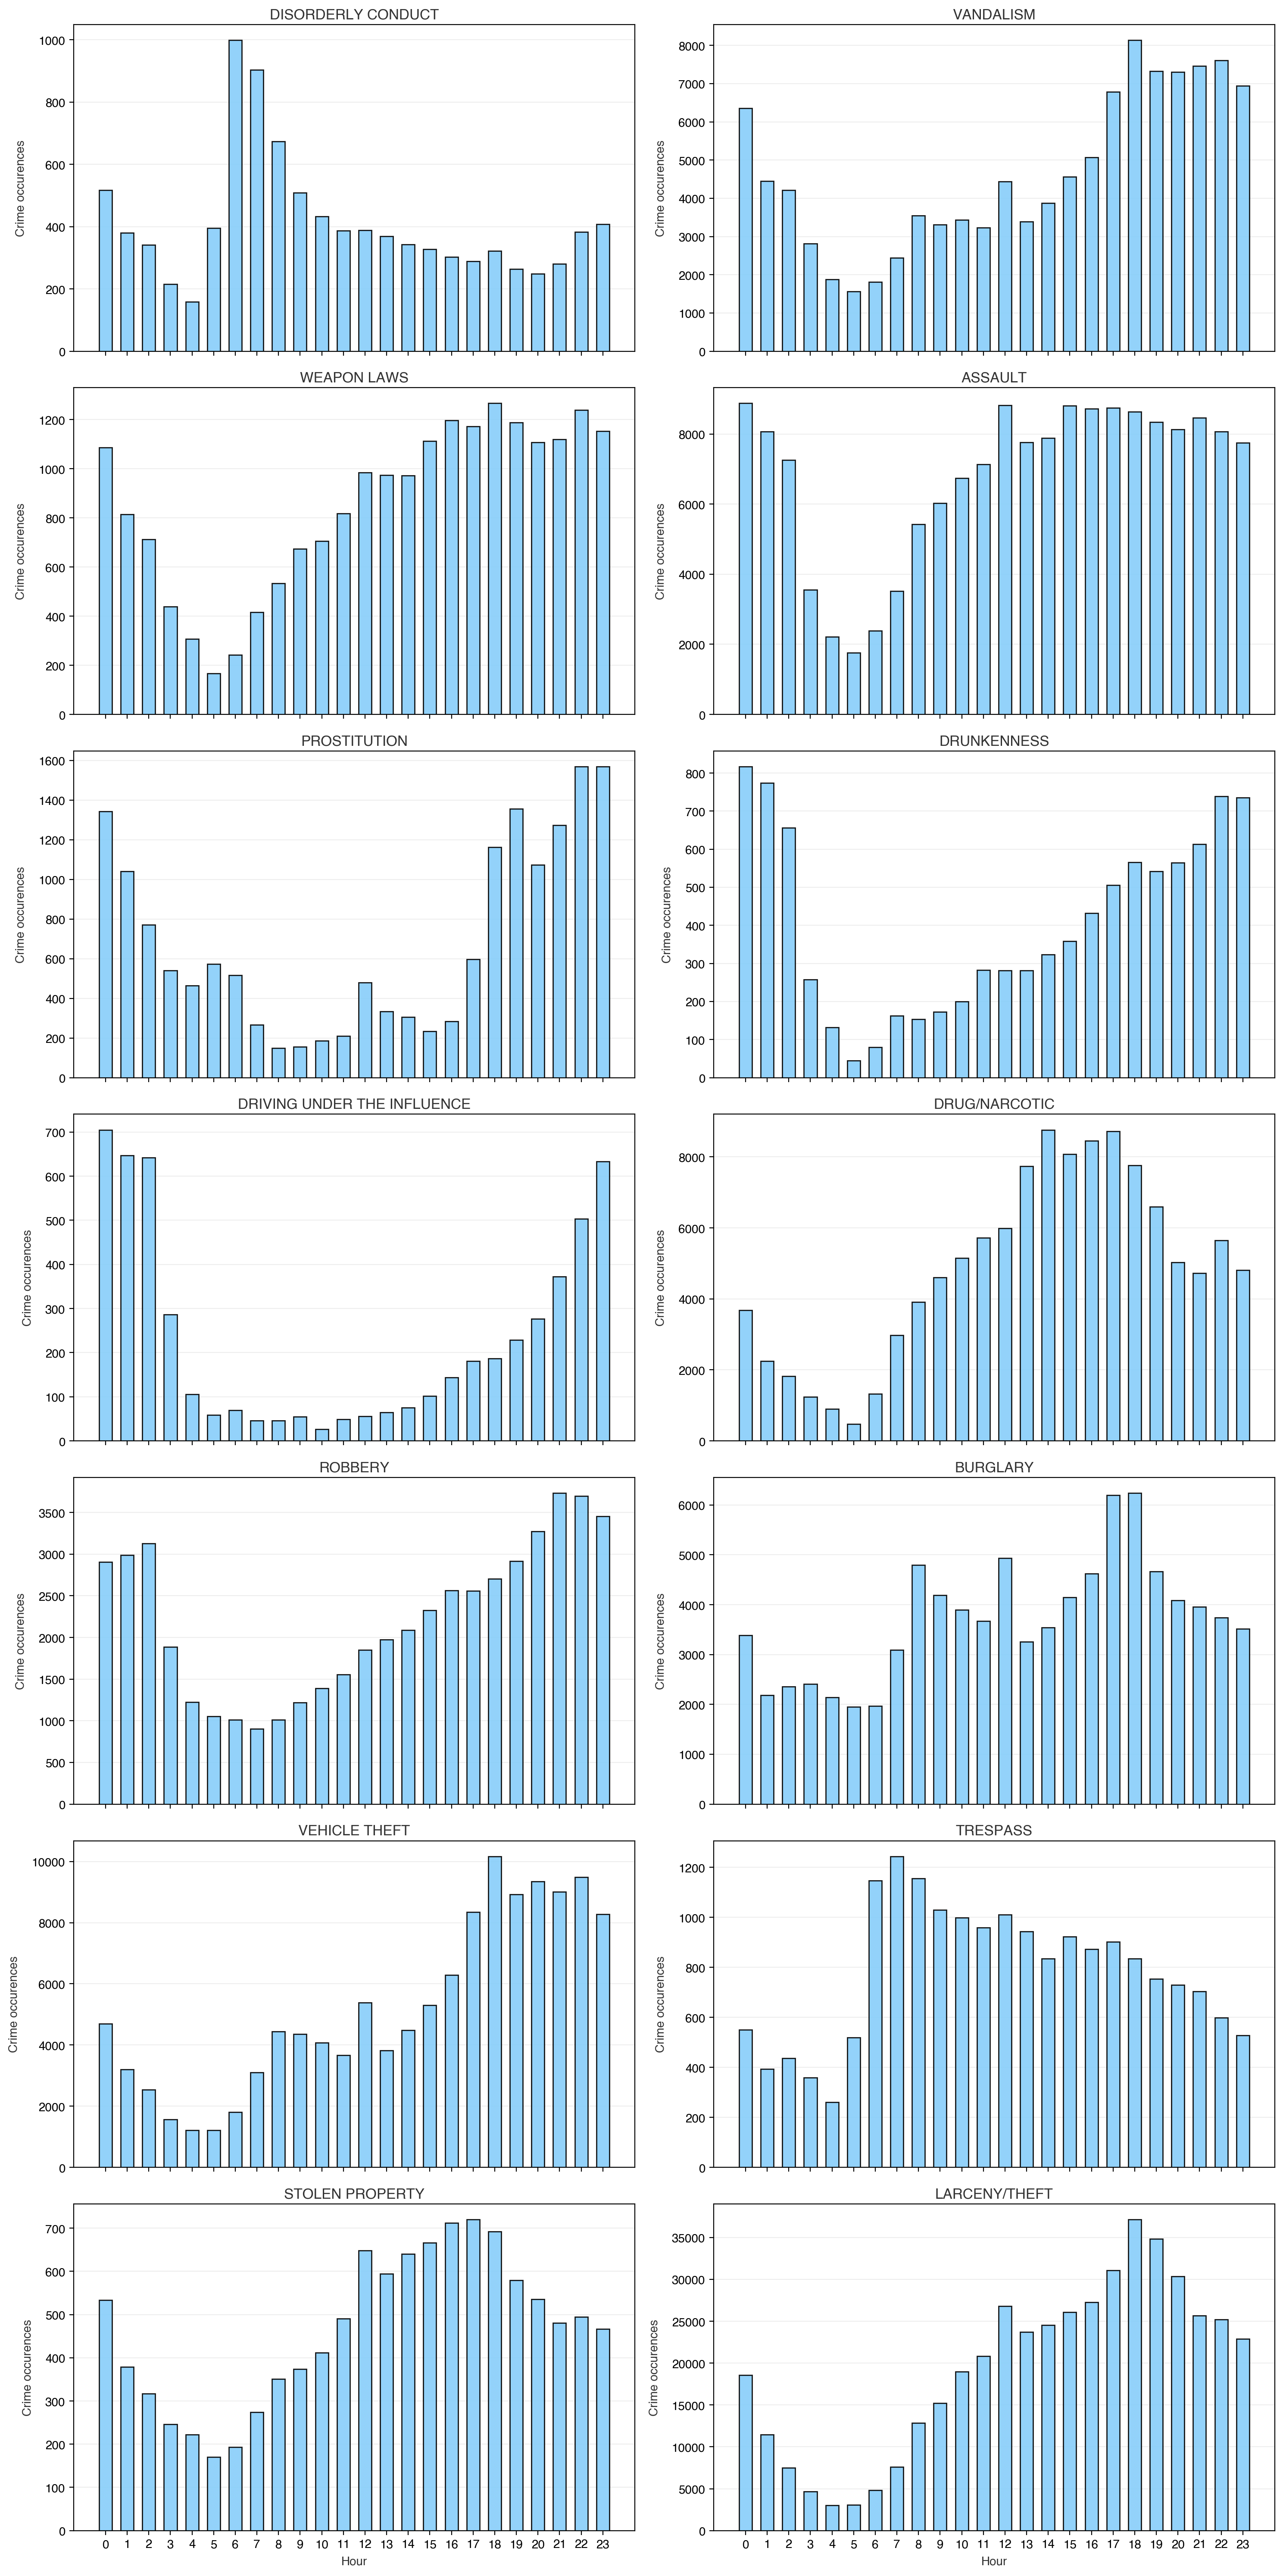

In [82]:
# make time to datetime and hour as a column to a copy of the dataframe
hourly_df = pre_2018_data.copy()
hourly_df['Time'] = pd.to_datetime(hourly_df['Time'], format='%H:%M')
hourly_df['hour'] = hourly_df['Time'].dt.hour

fig, axs = plt.subplots(7, 2, figsize=(15,30), sharex=True)
row_counter = 0
column_count = 0
for category in focuscrimes:
    if row_counter == 7:
        row_counter = 0
        column_count = 1
    # get frequency of each hour of the day having the respective category and sort based on hour number
    data = hourly_df[hourly_df["Category"] == category]["hour"].value_counts().sort_index()

    # plot barchart 
    axs[row_counter, column_count].bar(data.index, data.values, color="lightskyblue", width=0.6, alpha=0.9, edgecolor="black")

    axs[row_counter, column_count].set_title(category, pad=5, color='#333333', weight='bold')
    axs[row_counter, column_count].set_ylabel("Crime occurences", labelpad=10, color='#333333')
    
    axs[row_counter, column_count].set_axisbelow(True)
    axs[row_counter, column_count].yaxis.grid(True, color='#EEEEEE')

    axs[row_counter, column_count].set_xticks(np.arange(0, len(data.values), 1))

    row_counter += 1

axs[6, 0].set_xlabel("Hour", labelpad=5, color='#333333')
axs[6, 1].set_xlabel("Hour", labelpad=5, color='#333333')
fig.tight_layout()

168 hours of the week

Comments on plot: \
blabla

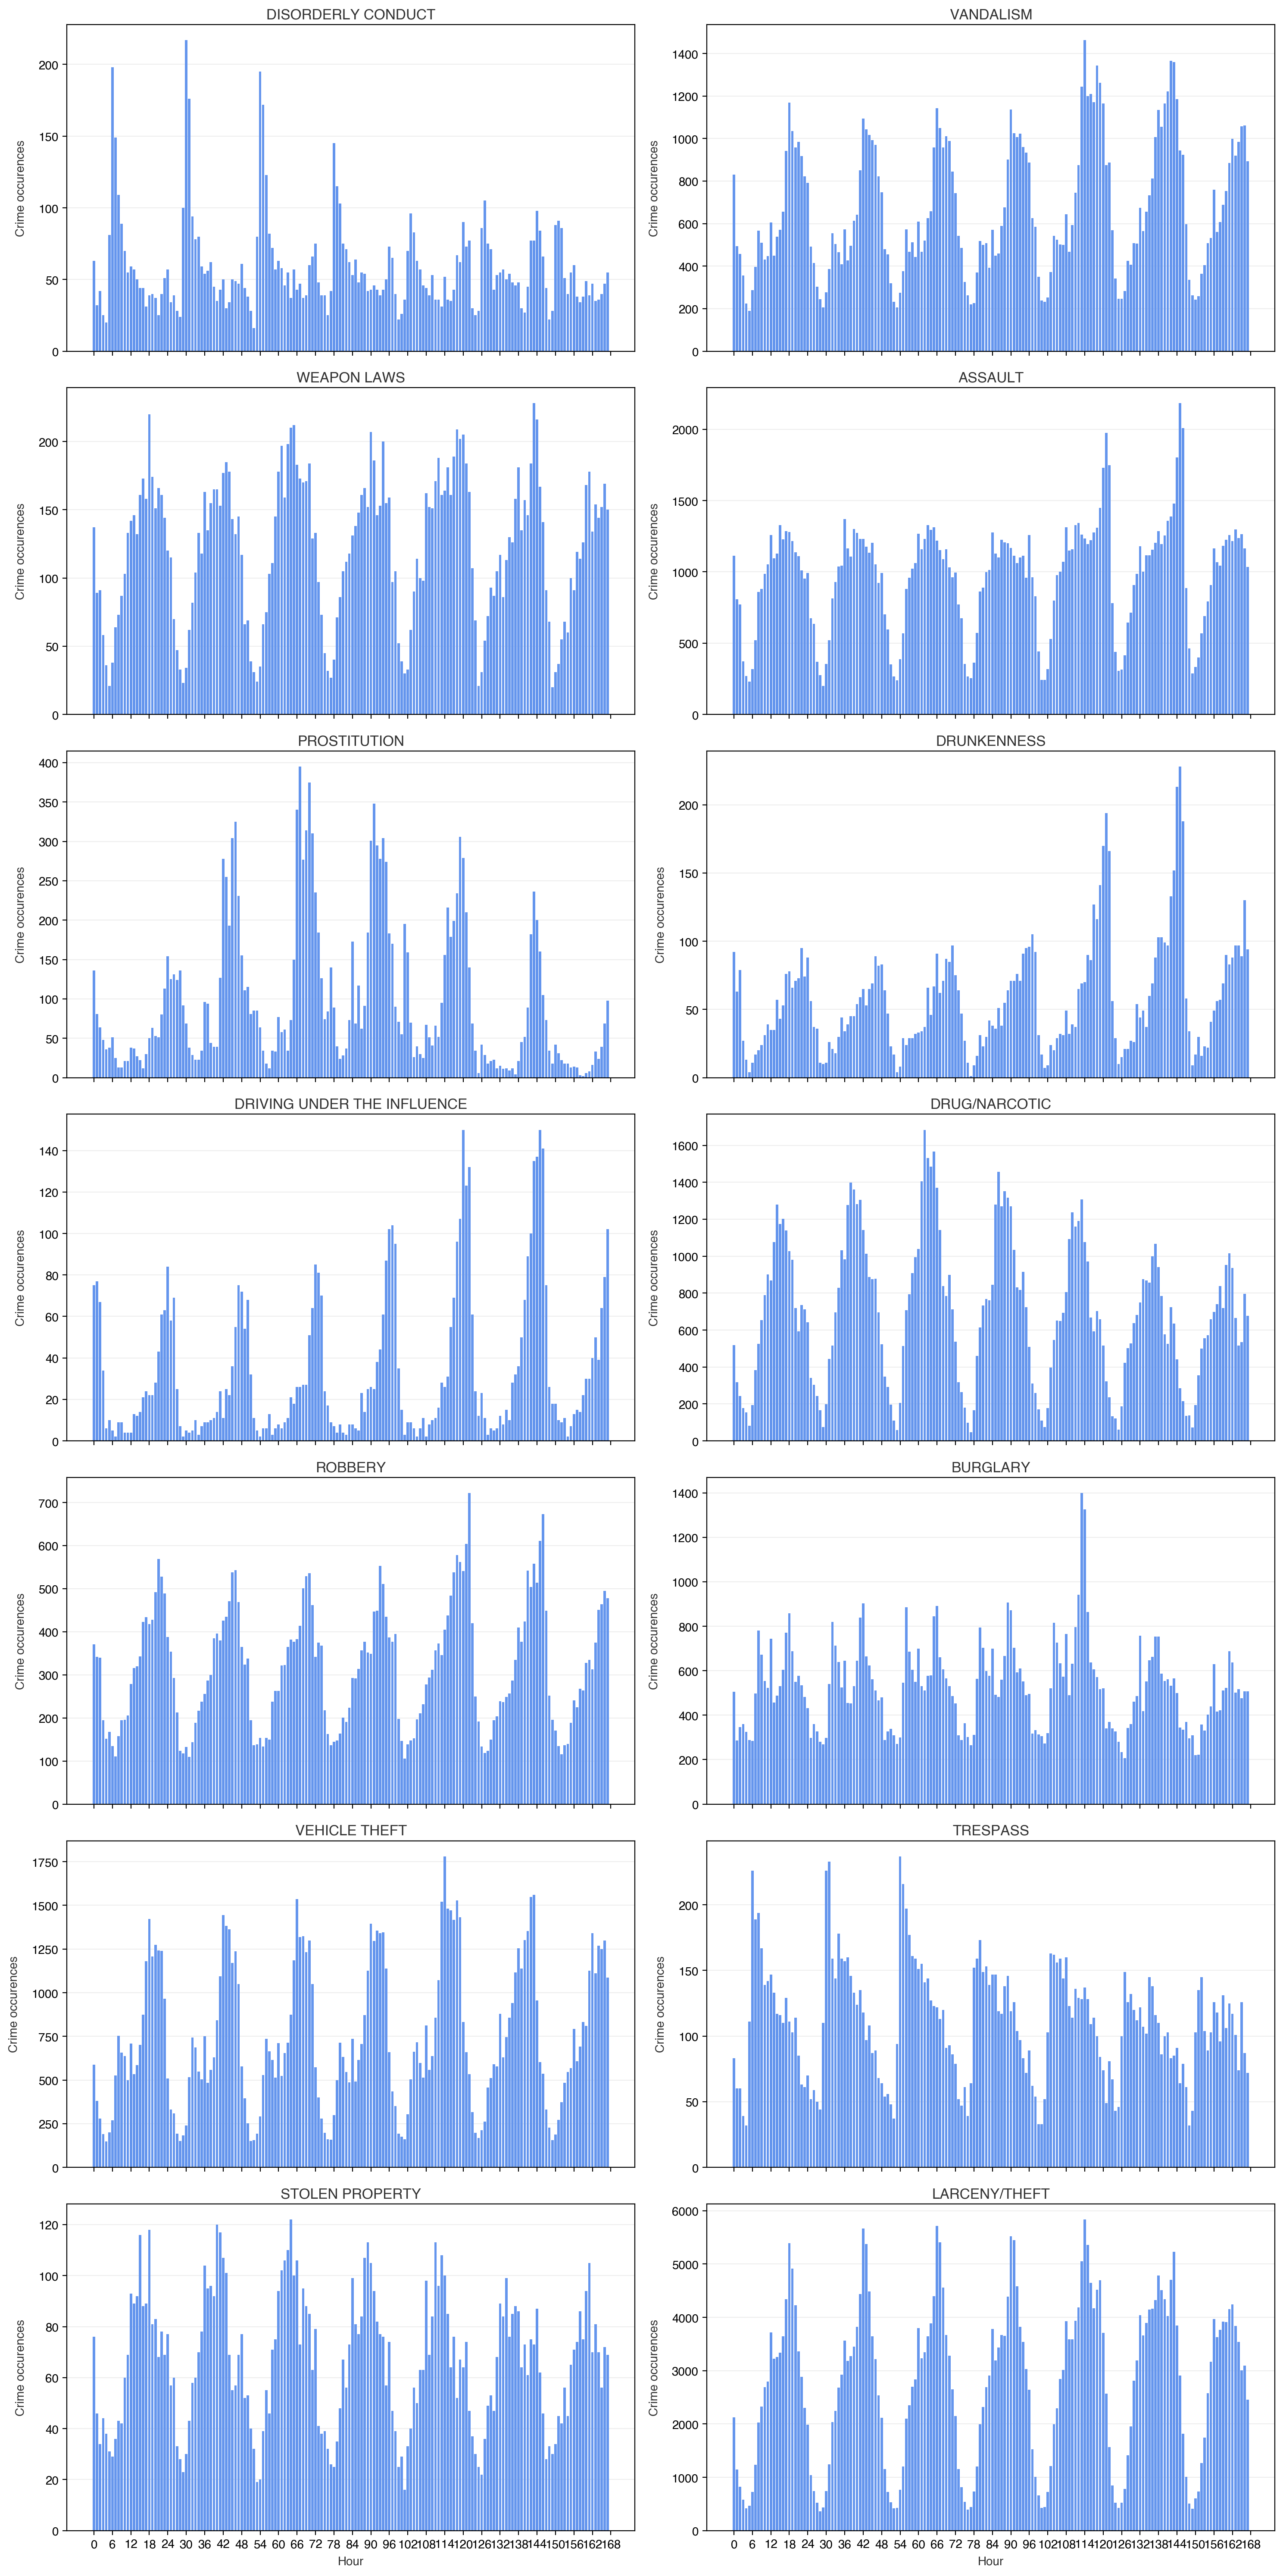

In [83]:
# make time to datetime and hour as a column to a copy of the dataframe
hourweek_df = pre_2018_data.copy()
hourweek_df['Time'] = pd.to_datetime(hourweek_df['Time'], format='%H:%M')
hourweek_df['hour'] = hourweek_df['Time'].dt.hour
hourweek_df['dayofWeekNum'] = hourweek_df['Date'].dt.dayofweek
hourweek_df["dayofWeekNum"] = hourweek_df["dayofWeekNum"]
hourweek_df['weeklyHour'] = hourweek_df['hour'] + hourweek_df['dayofWeekNum']*24

fig, axs = plt.subplots(7, 2, figsize=(15,30), sharex=True)
row_counter = 0
column_count = 0
for category in focuscrimes:
    if row_counter == 7:
        row_counter = 0
        column_count = 1
    # get frequency of weekly hour and sort by hour number
    data = hourweek_df[hourweek_df["Category"] == category]["weeklyHour"].value_counts().sort_index()

    # plot barchart 
    axs[row_counter, column_count].bar(data.index, data.values, color="cornflowerblue")

    axs[row_counter, column_count].set_title(category, pad=5, color='#333333', weight='bold')
    axs[row_counter, column_count].set_ylabel("Crime occurences", labelpad=10, color='#333333')
    
    axs[row_counter, column_count].set_axisbelow(True)
    axs[row_counter, column_count].yaxis.grid(True, color='#EEEEEE')

    axs[row_counter, column_count].set_xticks(np.arange(0, len(data.values)+1, 6))

    row_counter += 1

axs[6, 0].set_xlabel("Hour", labelpad=5, color='#333333')
axs[6, 1].set_xlabel("Hour", labelpad=5, color='#333333')
fig.tight_layout()

* Next choose a crime type that you like and create a calendar plot (Week 2, Part 4). Don't forget to comment on patterns you observe.

Comments on Calendar plot: \
blablalb ap

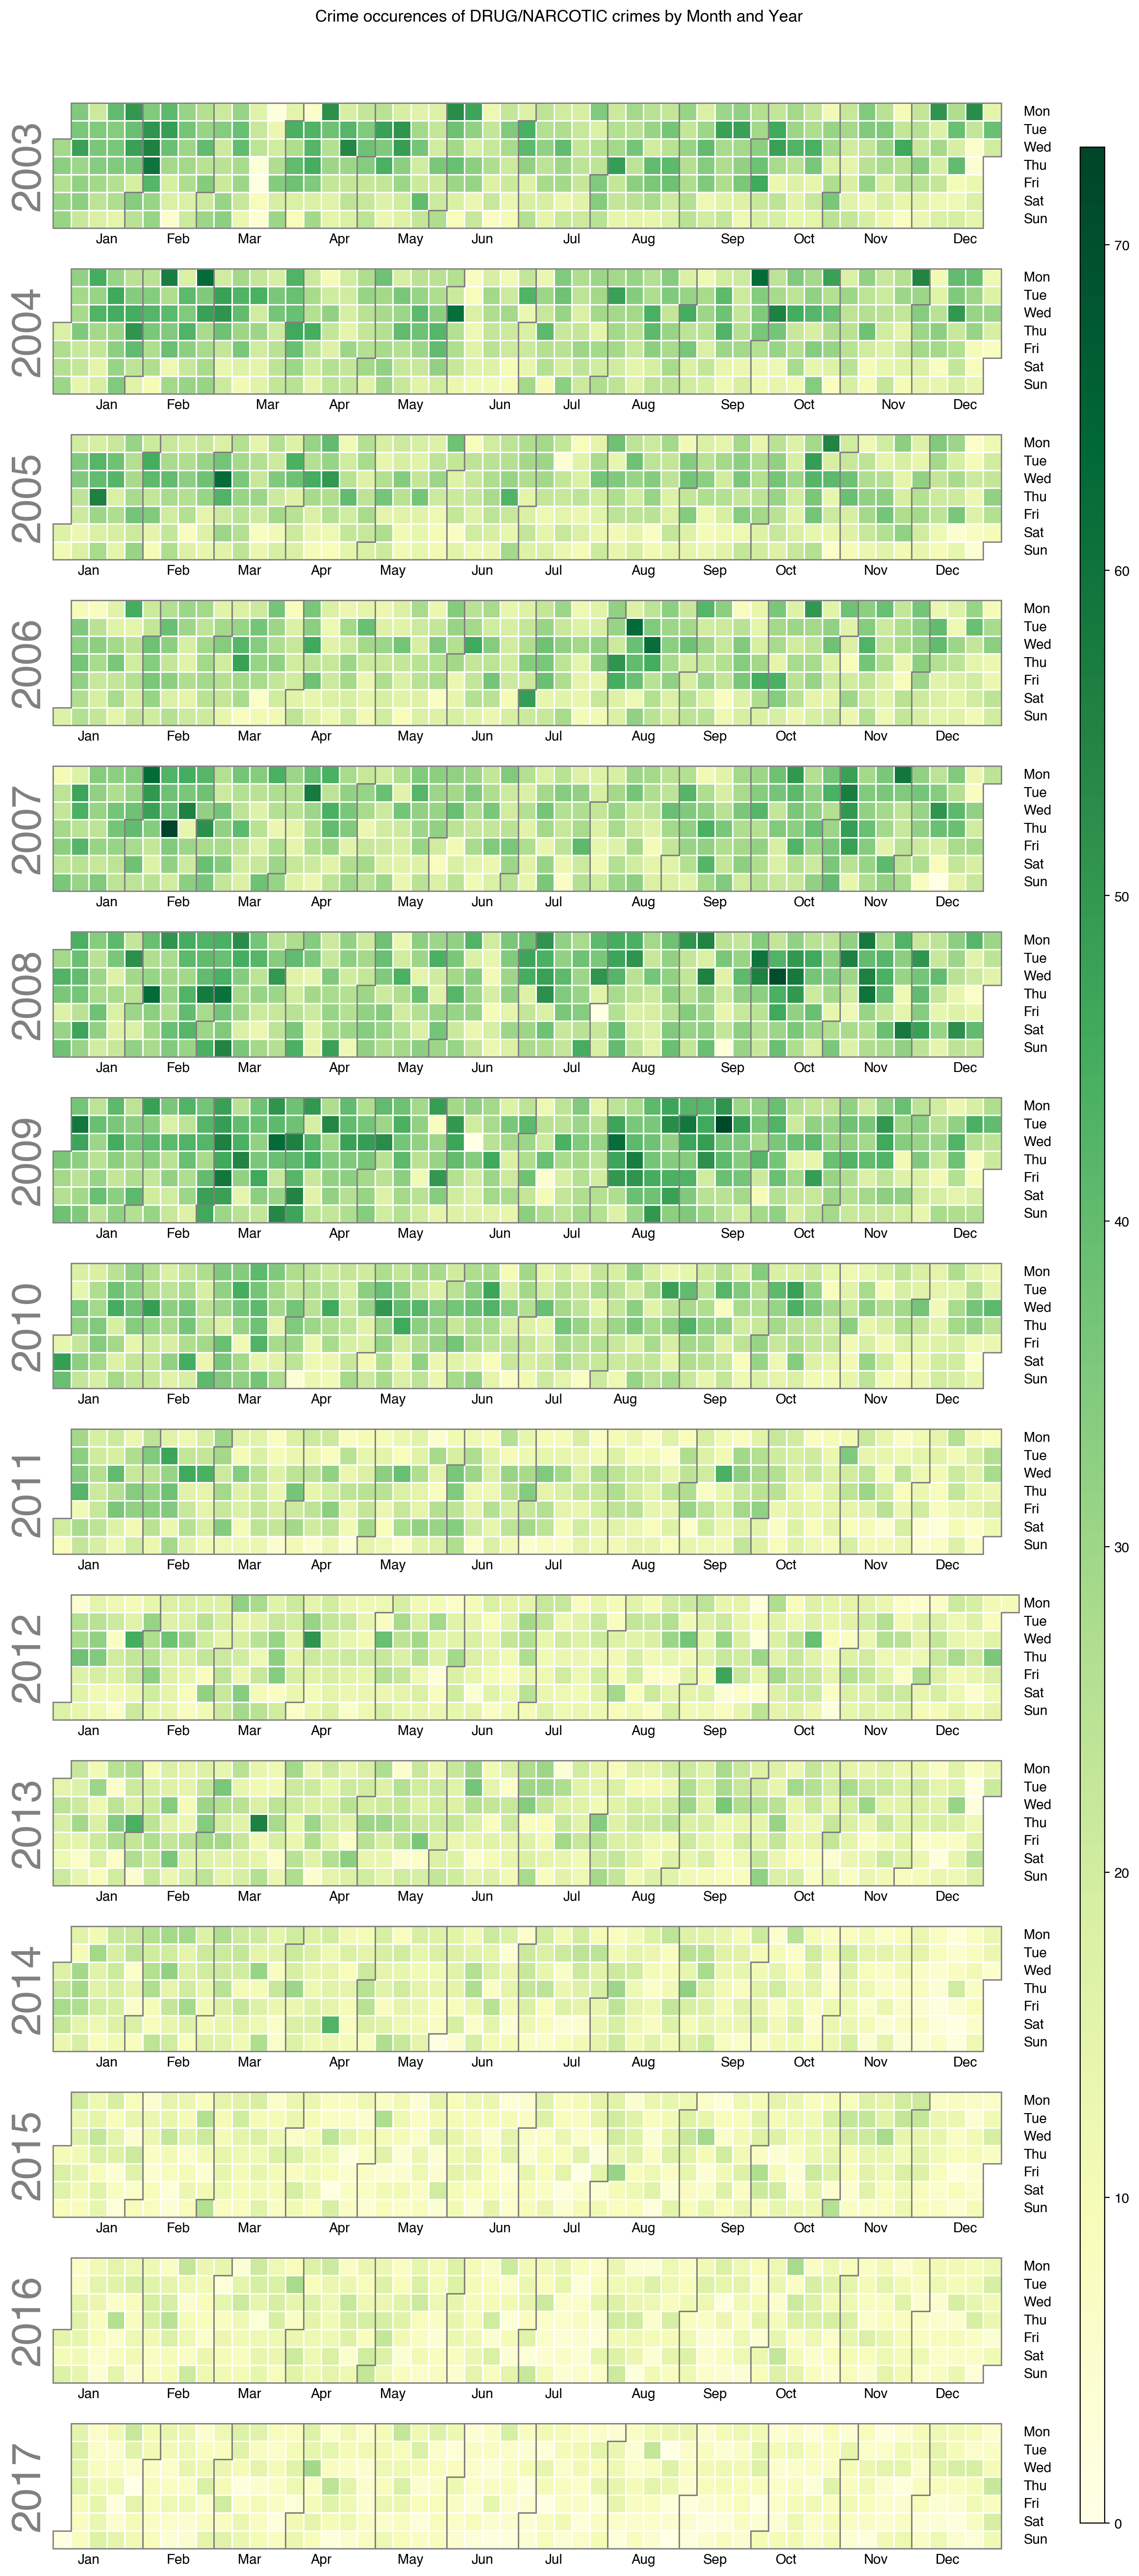

In [84]:
cal_data_ = pre_2018_data.copy()
category = "DRUG/NARCOTIC"
cal_data = cal_data_[cal_data_["Category"] == category]["Date"].value_counts()
fig = calplot.calplot(cal_data, cmap='YlGn', suptitle = f"Crime occurences of {category} crimes by Month and Year")

* Finally, choose a different crime type and create a polar plot of its 24hour cycle (Week 2, Part 4). Again, don't forget to comment as you would in a figure text.

In [79]:
polar_df_ = pre_2018_data.copy()
polar_df_['Time'] = pd.to_datetime(polar_df_['Time'], format='%H:%M')
polar_df_['hour'] = polar_df_['Time'].dt.hour
category = "PROSTITUTION"
polar_series = polar_df_[polar_df_["Category"] == category]["hour"].value_counts()
polar_df = pd.DataFrame({'Hour': polar_series.index, 'Occurences': polar_series.values})
fig = px.bar_polar(polar_df, r="Occurences", theta="Hour", template="plotly_dark",
                   color_discrete_sequence= px.colors.sequential.Plasma_r)
fig.show()

## A1 Part 2: Dataviz questions 

Have a look at the encoding dataviz lecture (Week 4), then answer the following questions in your own words. 

* Mention 10 examples of ways we can encode data.
    1. Positional: We can encode data positionally by for example plotting 2-dimensional points in a coordinate system to give the data meaning in a positional sense. This way of encoding data also captures a natural ordering that we as humans naturally recognize.
    2. Length: We can encode data by length for example by showing a number in terms of how long it is. Such that a number 10, will be represented using a length of 10. This encoding type is qualitatively perceived by users, and easily allows for comparisons. A bar chart is an example hereof.
    3. Size: We can encode data by size, which can also be called area, by for example encoding the popularity of a node in a network through the size of the node.
    4. Shape: We can encode data by shape to make the user able to quickly perceive different categories for example.
    5. Color: Color encoding can be used similarly to shape encoding, however color is more intuitively perceived by humans, which is both positive in terms of conveying a message, but one has to be vary since colors also carry an underlying interpretation (red is bad, green is good).
    6. Angle: 
    7. Texture: We can also encode data using textures. Texture can be used but are often a soft form of encoding information as the texture is not felt physically (most of the time), but nevertheless it can be used as a categorical encoding.
    8. Pattern:
    9. Line weight:
    10. Line ending:
* Are all encodings created equally? Why not? Can you think of an example from the previous lectures?
    - 
* Mention 3 encodings that are difficult for the human eye to parse. Can you find an example of a visualization online that uses one of those three?
    - 
* Explain in your own words: What is the problem with pie-charts?
    - Pie-charts are often a bad choice of visualization tool because visualizing sizes relative to each other is not easily perceived in a pie chart - it is difficult for the human brain to estimate quantities by reading off angles, which in turn makes it difficult to compare and comprehend slices of the pie chart. Pie charts are usually used to show a comparison of some sorts between multiple elements, however if these elements are somewhat similar then it becomes extremely hard to compare. In such cases, using a bar chart of some sort would be a much better alternative because the human brain perceive length much better.

## A1 Part 3: Visualizing geodata using Plotly

In this sub-assignment I want you to create a choropleth map of San Francisco, showing where it's safest to leave your car on Sundays, following the instructions from Week 3.

When you're done, reflect on the following questions.

* Based on your map and analysis, where should you park the car for it to be safest on a Sunday? And where's the worst place?
   - From the choropleth map below we have used a colormap to easily perceive the number of vehicle theft crimes that occur and their relative values. Hence we can see that it safest to park the car in **Tenderloin** on a sunday, and on the other hand the worst district is **Ingleside**.
* Using visualizatios can help us uncover powerful data-patterns. However, when designing visualizations, we need to be aware of several illusions that can lead viewers to misinterpret the data we are showing (i.e. perceptual errors):
   - Try to change the range of data-values in the plot above. Is there a way to make the difference between district less evident?
      - The distinction between district is based on the color hues. Because of this, changing the color range would allow one to manipulate what would seem like a less apparent distinction between district and the actual number of comitted vehicle thefts.
   - Why do you think perceptual errors are a problem? Try to think of a few examples.
      - Perceptual errors are very problematic because individuals carry different world views that biases their understanding and perception of data. This means that the same visualization and/or data can be perceived very differently between different users.
      Example of perceptual error in map plot:
      1. It is difficult to observe a visual distinction between values close to each other. For example, in Richmond there has been comitted 1358 vehicle thefts, and in Southern that number is 1540. However, the color distinction is not very obvious to perceive. A perceptual error can occur exactly because of this - the user is mostly drawn towards the extremes.

In [95]:
map_plot_data = pre_2018_data.copy()
map_plot_data1 = map_plot_data[(map_plot_data["Category"] == "VEHICLE THEFT") & (map_plot_data["DayOfWeek"] == "Sunday")]["PdDistrict"].value_counts()
map_plot_data2 = pd.DataFrame({'District': map_plot_data1.index, 'Num_vehicleThefts': map_plot_data1.values})

with urlopen('https://raw.githubusercontent.com/suneman/socialdata2022/main/files/sfpd.geojson') as response:
    shapedata = json.load(response)

fig = px.choropleth_mapbox(map_plot_data2, geojson=shapedata, locations='District', color='Num_vehicleThefts',
                           color_continuous_scale="Viridis",
                           range_color=(0, max(map_plot_data2.Num_vehicleThefts)+200),
                           mapbox_style="carto-positron",
                           zoom=10.7, center = {"lat": 37.7749, "lon": -122.4194},
                           opacity=0.5,
                           labels={'Num_vehicleThefts':'Number of vehicle thefts'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## A1 Part 4: Errors in the data

We started the course by plotting simple histogram and bar plots that showed a lot of cool patterns. But sometimes the binning can hide imprecision, irregularity, and simple errors in the data that could be misleading. In the work we've done so far, we've already come across at least three examples of this in the SF data (listed in Part 3 of Week 4). 

The data errors we discovered at the end of Week 4 become difficult to notice when we aggregate data (and when we calculate mean values, as well as statistics more generally). Thus, when we visualize, errors become difficult to notice when binning the data. We explore this process in the exercise below.

* In each of the 3 examples we listed during Week 4, describe in your own words how the data-errors I call attention to above can bias the binned versions of the data. 
    1. The first example is that there is a noticable spike in prostitution crimes on Thursdays. DESCRIBE
    2. The second example is that timestamps of crime reporting seemed to be chunked around whole hours, 15 minutes past or 30 minutes past. DESCRIBE
    3. The third example is that the *Hall of Justice* on the 800 block of Bryant street seems to be a hotspot for sex offences, which seems unlikely. DESCRIBE
* Also, briefly mention how not noticing these errors can result in misconceptions about the underlying patterns of what's going on in San Francisco (and our modeling).
    - BLABLA
* Find your own example of human noise in the data and visualize it.
    - BLABLA

In [97]:
test_copy = pre_2018_data.copy()
test_copy

PdId  IncidntNum  Incident Code        Category  \
0         4133422003074    41334220           3074         ROBBERY   
1         5118535807021    51185358           7021   VEHICLE THEFT   
2         4018830907021    40188309           7021   VEHICLE THEFT   
3        11014543126030   110145431          26030           ARSON   
4        10108108004134   101081080           4134         ASSAULT   
...                 ...         ...            ...             ...   
2129520  17050730416710   170507304          16710   DRUG/NARCOTIC   
2129521  17071435504014   170714355           4014         ASSAULT   
2129522  17053348465010   170533484          65010  OTHER OFFENSES   
2129523  17102776330130   171027763          30130  OTHER OFFENSES   
2129524  17088142128160   170881421          28160       VANDALISM   

                                          Descript  DayOfWeek       Date  \
0                            ROBBERY, BODILY FORCE     Monday 2004-11-22   
1                                STOLEN AUTOMOBILE    Tuesday 2005-10-18   
2                                STOLEN AUTOMOBILE     Sunday 2004-02-15   
3                                            ARSON     Friday 2011-02-18   
4                                          BATTERY     Sunday 2010-11-21   
...                                            ...        ...        ...   
2129520      POSSESSION OF NARCOTICS PARAPHERNALIA   Thursday 2017-06-22   
2129521       AGGRAVATED ASSAULT WITH BODILY FORCE     Friday 2017-09-01   
2129522                   TRAFFIC VIOLATION ARREST     Friday 2017-06-30   
2129523                 PEDDLING WITHOUT A LICENSE  Wednesday 2017-12-20   
2129524  MALICIOUS MISCHIEF, VANDALISM OF VEHICLES     Friday 2017-10-27   

          Time PdDistrict      Resolution  ...  \
0        17:50  INGLESIDE            NONE  ...   
1        20:00       PARK            NONE  ...   
2        02:00   SOUTHERN            NONE  ...   
3        05:27  INGLESIDE            NONE  ...   
4        17:00   SOUTHERN            NONE  ...   
...        ...        ...             ...  ...   
2129520  01:42    CENTRAL   ARREST, CITED  ...   
2129521  17:00       PARK            NONE  ...   
2129522  17:50    BAYVIEW  ARREST, BOOKED  ...   
2129523  15:41   SOUTHERN  ARREST, BOOKED  ...   
2129524  21:30  INGLESIDE            NONE  ...   

        Fix It Zones as of 2017-11-06  2 2  DELETE - HSOC Zones 2 2  \
0                                      NaN                      NaN   
1                                      NaN                      NaN   
2                                      NaN                      NaN   
3                                      NaN                      NaN   
4                                      NaN                      NaN   
...                                    ...                      ...   
2129520                                NaN                      NaN   
2129521                                NaN                      NaN   
2129522                                NaN                      NaN   
2129523                                3.0                      1.0   
2129524                                NaN                      NaN   

         Fix It Zones as of 2018-02-07 2 2  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                                      NaN   
...                                    ...   
2129520                                NaN   
2129521                                NaN   
2129522                               22.0   
2129523                                3.0   
2129524                                NaN   

        CBD, BID and GBD Boundaries as of 2017 2 2  \
0                                              NaN   
1                                              NaN   
2                                              NaN   
3                                         

In [100]:
misplaced_rows = 0
for idx, row in df.iterrows():
    if row.Y > 75:
        misplaced_rows += 1

In [101]:
misplaced_rows

141

In [102]:
test_copy.shape

(2084466, 36)

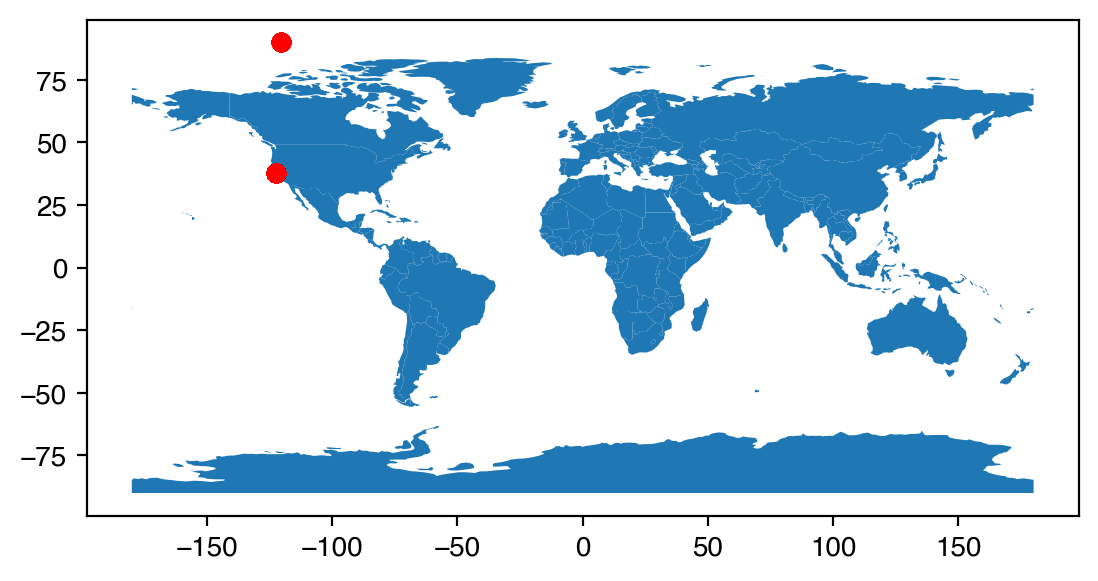

In [98]:
import geopandas as gpd
from shapely.geometry import Point
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt

geometry = [Point(xy) for xy in zip(test_copy['X'], test_copy['Y'])]
gdf = GeoDataFrame(test_copy, geometry=geometry)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(), marker='o', color='red')
plt.show()